¿Se puede predecir el tiempo de entrega de una orden?

In [1027]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

In [1028]:
path = r'C:\Users\Pedro\Documents\Mineria_dataser'
prefix = "Fecom Inc"

df_customers = pd.read_csv(f'{path}/{prefix} Customer List.csv', sep=';')
df_geolocations = pd.read_csv(f'{path}/{prefix} Geolocations.csv', sep=';')
df_order_items = pd.read_csv(f'{path}/{prefix} Order Items.csv', sep=';')
df_order_payments = pd.read_csv(f'{path}/{prefix} Order Payments.csv', sep=';')
df_orders = pd.read_csv(f'{path}/{prefix} Orders.csv', sep=';')
df_products = pd.read_csv(f'{path}/{prefix} Products.csv', sep=';')
df_sellers = pd.read_csv(f'{path}/{prefix} Sellers List.csv', sep=';')
df_reviews = pd.read_csv(f'{path}/Fecom_Inc_Order_Reviews_No_Emojis.csv', sep=';')

df_products

C:\Users\Pedro\AppData\Local\Temp\ipykernel_24828\1108309182.py:5: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geolocations = pd.read_csv(f'{path}/{prefix} Geolocations.csv', sep=';')


,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,700.0,31.0,13.0,20.0


In [1029]:
len(df_orders['Order_ID'].unique())

99441

In [1030]:
df_orders['Order_Purchase_Timestamp'] = pd.to_datetime(df_orders['Order_Purchase_Timestamp'])
df_orders['Order_Delivered_Customer_Date'] = pd.to_datetime(df_orders['Order_Delivered_Customer_Date'])
df_orders['Order_Estimated_Delivery_Date'] = pd.to_datetime(df_orders['Order_Estimated_Delivery_Date'])

In [1031]:
df_orders['Order_Delivery_Time'] = (df_orders['Order_Delivered_Customer_Date'] - df_orders['Order_Purchase_Timestamp']).dt.days
df_orders['Order_Estimated_Delivery_Time'] = (df_orders['Order_Estimated_Delivery_Date'] - df_orders['Order_Purchase_Timestamp']).dt.days
#just when order status is 'delivered'
df_orders = df_orders[df_orders['Order_Status'] == 'delivered']

In [1032]:
df_orders

,Order_ID,Customer_Trx_ID,Order_Status,Order_Purchase_Timestamp,Order_Approved_At,Order_Delivered_Carrier_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Order_Delivery_Time,Order_Estimated_Delivery_Time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2023-10-02 10:56:00,2023-10-02 11:07,2023-10-04 19:55,2023-10-10 21:25:00,2023-10-18,8.0,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2024-07-24 20:41:00,2024-07-26 03:24,2024-07-26 14:31,2024-08-07 15:27:00,2024-08-13,13.0,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2024-08-08 08:38:00,2024-08-08 08:55,2024-08-08 13:50,2024-08-17 18:06:00,2024-09-04,9.0,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2023-11-18 19:28:00,2023-11-18 19:45,2023-11-22 13:39,2023-12-02 00:28:00,2023-12-15,13.0,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2024-02-13 21:18:00,2024-02-13 22:20,2024-02-14 19:46,2024-02-16 18:17:00,2024-02-26,2.0,12
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2023-03-09 09:54:00,2023-03-09 09:54,2023-03-10 11:18,2023-03-17 15:08:00,2023-03-28,8.0,18
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2024-02-06 12:58:00,2024-02-06 13:10,2024-02-07 23:22,2024-02-28 17:37:00,2024-03-02,22.0,24
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2023-08-27 14:46:00,2023-08-27 15:04,2023-08-28 20:52,2023-09-21 11:24:00,2023-09-27,24.0,30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2024-01-08 21:28:00,2024-01-08 21:36,2024-01-12 15:35,2024-01-25 23:32:00,2024-02-15,17.0,37


In [1033]:
df_items_orders = pd.merge(df_order_items, df_orders[['Order_ID', 'Order_Status', 'Order_Delivery_Time', 'Customer_Trx_ID', 'Order_Purchase_Timestamp']], on='Order_ID')
df_items_orders = pd.merge(df_items_orders, df_products, on='Product_ID')
df_items_orders

,Order_ID,Order_Item_ID,Product_ID,Seller_ID,Shipping_Limit_Date,Price,Freight_Value,Order_Status,Order_Delivery_Time,Customer_Trx_ID,Order_Purchase_Timestamp,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2023-09-19 09:45,58.90,13.29,delivered,7.0,3ce436f183e68e07877b285a838db11a,2023-09-13 08:59:00,Cool_Stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2023-05-03 11:05,239.90,19.93,delivered,16.0,f6dd3ec061db4e3987629fe6b26e5cce,2023-04-26 10:53:00,Pet_Shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2024-01-18 14:48,199.00,17.87,delivered,7.0,6489ae5e4333f3693df5ad4372dab6d3,2024-01-14 14:33:00,Furniture_Decor,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2024-08-15 10:10,12.99,12.79,delivered,6.0,d4eb9395c8c0431ee92fce09860c5a06,2024-08-08 10:00:00,Perfumery,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2023-02-13 13:57,199.90,18.14,delivered,25.0,58dbd0b2d70206bf40e62cd34e84d795,2023-02-04 13:57:00,Garden_Tools,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2024-05-02 04:11,299.99,43.41,delivered,17.0,b51593916b4b8e0d6f66f2ae24f2673d,2024-04-23 13:57:00,Housewares,10150.0,89.0,15.0,40.0
110193,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2024-07-20 04:31,350.00,36.53,delivered,9.0,84c5d4fbaf120aae381fad077416eaa0,2024-07-14 10:26:00,Computers_Accessories,8950.0,45.0,26.0,38.0
110194,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2023-10-30 17:14,99.90,16.95,delivered,4.0,29309aa813182aaddc9b259e31b870e6,2023-10-23 17:07:00,Sports_Leisure,967.0,21.0,24.0,19.0
110195,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2023-08-21 00:04,55.99,8.72,delivered,1.0,b5e6afd5a41800fdf401e0272ca74655,2023-08-14 23:02:00,Computers_Accessories,100.0,20.0,20.0,20.0


In [1034]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [1035]:
df_items_orders

,Order_ID,Order_Item_ID,Product_ID,Seller_ID,Shipping_Limit_Date,Price,Freight_Value,Order_Status,Order_Delivery_Time,Customer_Trx_ID,Order_Purchase_Timestamp,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2023-09-19 09:45,58.90,13.29,delivered,7.0,3ce436f183e68e07877b285a838db11a,2023-09-13 08:59:00,Cool_Stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2023-05-03 11:05,239.90,19.93,delivered,16.0,f6dd3ec061db4e3987629fe6b26e5cce,2023-04-26 10:53:00,Pet_Shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2024-01-18 14:48,199.00,17.87,delivered,7.0,6489ae5e4333f3693df5ad4372dab6d3,2024-01-14 14:33:00,Furniture_Decor,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2024-08-15 10:10,12.99,12.79,delivered,6.0,d4eb9395c8c0431ee92fce09860c5a06,2024-08-08 10:00:00,Perfumery,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2023-02-13 13:57,199.90,18.14,delivered,25.0,58dbd0b2d70206bf40e62cd34e84d795,2023-02-04 13:57:00,Garden_Tools,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2024-05-02 04:11,299.99,43.41,delivered,17.0,b51593916b4b8e0d6f66f2ae24f2673d,2024-04-23 13:57:00,Housewares,10150.0,89.0,15.0,40.0
110193,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2024-07-20 04:31,350.00,36.53,delivered,9.0,84c5d4fbaf120aae381fad077416eaa0,2024-07-14 10:26:00,Computers_Accessories,8950.0,45.0,26.0,38.0
110194,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2023-10-30 17:14,99.90,16.95,delivered,4.0,29309aa813182aaddc9b259e31b870e6,2023-10-23 17:07:00,Sports_Leisure,967.0,21.0,24.0,19.0
110195,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2023-08-21 00:04,55.99,8.72,delivered,1.0,b5e6afd5a41800fdf401e0272ca74655,2023-08-14 23:02:00,Computers_Accessories,100.0,20.0,20.0,20.0


In [1036]:
#add seller postal code
df_items_orders = pd.merge(df_items_orders, df_sellers[['Seller_ID', 'Seller_Postal_Code']], on='Seller_ID')
#add customer postal code
df_items_orders = pd.merge(df_items_orders, df_customers[['Customer_Trx_ID', 'Customer_Postal_Code']], on='Customer_Trx_ID')
#add customer geolocation
df_items_orders = pd.merge(df_items_orders, df_geolocations[['Geo_Postal_Code', 'Geo_Lat', 'Geo_Lon']], left_on='Customer_Postal_Code', right_on='Geo_Postal_Code')
#change name of geo_lat and geo_lon to customer_lat and customer_lon
df_items_orders.rename(columns={'Geo_Lat': 'Customer_Lat', 'Geo_Lon': 'Customer_Lon'}, inplace=True)
#add seller geolocation
df_items_orders = pd.merge(df_items_orders, df_geolocations[['Geo_Postal_Code', 'Geo_Lat', 'Geo_Lon']], left_on='Seller_Postal_Code', right_on='Geo_Postal_Code')
#change name of geo_lat and geo_lon to seller_lat and seller_lon
df_items_orders.rename(columns={'Geo_Lat': 'Seller_Lat', 'Geo_Lon': 'Seller_Lon'}, inplace=True)
#drop postal codes
df_items_orders.drop(columns=['Customer_Postal_Code', 'Seller_Postal_Code', 'Geo_Postal_Code_x', 'Geo_Postal_Code_y'], inplace=True)
#calculate distance
# Convert latitude and longitude columns to float
df_items_orders['Customer_Lat'] = df_items_orders['Customer_Lat'].str.replace(',', '.').astype(float)
df_items_orders['Customer_Lon'] = df_items_orders['Customer_Lon'].str.replace(',', '.').astype(float)
df_items_orders['Seller_Lat'] = df_items_orders['Seller_Lat'].str.replace(',', '.').astype(float)
df_items_orders['Seller_Lon'] = df_items_orders['Seller_Lon'].str.replace(',', '.').astype(float)

# Calculate distance
df_items_orders['Distance'] = haversine(df_items_orders['Customer_Lat'], df_items_orders['Customer_Lon'], df_items_orders['Seller_Lat'], df_items_orders['Seller_Lon'])

# Drop geolocation columns
df_items_orders.drop(columns=['Customer_Lat', 'Customer_Lon', 'Seller_Lat', 'Seller_Lon'], inplace=True)
#drop duplicates
df_items_orders.drop_duplicates(inplace=True)
#drop null values
df_items_orders.dropna(inplace=True)


In [1037]:
# Filtrar los Order_ID duplicados (aquellos que aparecen más de una vez)
duplicated_order_ids = df_items_orders['Order_ID'][df_items_orders['Order_ID'].duplicated(keep=False)]

df_items_orders = df_items_orders[~df_items_orders['Order_ID'].isin(duplicated_order_ids)].dropna()
df_items_orders.reset_index(drop=True, inplace=True)
#opcional usar el volumen en vez de las dimensiones.
# 1. Calcular volumen del producto (en cm³)
df_items_orders["product_volume"] = df_items_orders["Product_Height_Cm"] * df_items_orders["Product_Width_Cm"] * df_items_orders["Product_Length_Cm"]

# 2. Eliminar columnas de dimensiones
df_items_orders.drop(columns=["Product_Height_Cm", "Product_Width_Cm", "Product_Length_Cm"], inplace=True)
df_items_orders = pd.get_dummies(df_items_orders, columns=["Product_Category_Name"], drop_first=True) ##para poder trabajar la categoria del producto, que en tabla era un string
df_items_orders = df_items_orders.drop(columns=["Order_ID", "Order_Item_ID", "Product_ID", "Seller_ID", "Shipping_Limit_Date", "Order_Status", 'Customer_Trx_ID','Seller_ID', 'Price'])
df_items_orders

,Freight_Value,Order_Delivery_Time,Order_Purchase_Timestamp,Product_Weight_Gr,Distance,product_volume,Product_Category_Name_Air_Conditioning,Product_Category_Name_Art,Product_Category_Name_Arts_And_Craftmanship,Product_Category_Name_Audio,...,Product_Category_Name_Security_And_Services,Product_Category_Name_Signaling_And_Security,Product_Category_Name_Small_Appliances,Product_Category_Name_Small_Appliances_Home_Oven_And_Coffee,Product_Category_Name_Sports_Leisure,Product_Category_Name_Stationery,Product_Category_Name_Tablets_Printing_Image,Product_Category_Name_Telephony,Product_Category_Name_Toys,Product_Category_Name_Watches_Gifts
0,13.29,7.0,2023-09-13 08:59:00,650.0,765.248762,3528.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19.93,16.0,2023-04-26 10:53:00,30000.0,477.138176,60000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,17.87,7.0,2024-01-14 14:33:00,3050.0,80.846523,14157.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12.79,6.0,2024-08-08 10:00:00,200.0,192.666408,2400.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18.14,25.0,2023-02-04 13:57:00,3750.0,744.756957,42000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84025,43.41,17.0,2024-04-23 13:57:00,10150.0,1033.638118,53400.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84026,36.53,9.0,2024-07-14 10:26:00,8950.0,523.544995,44460.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84027,16.95,4.0,2023-10-23 17:07:00,967.0,523.544995,9576.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
84028,8.72,1.0,2023-08-14 23:02:00,100.0,504.284007,8000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


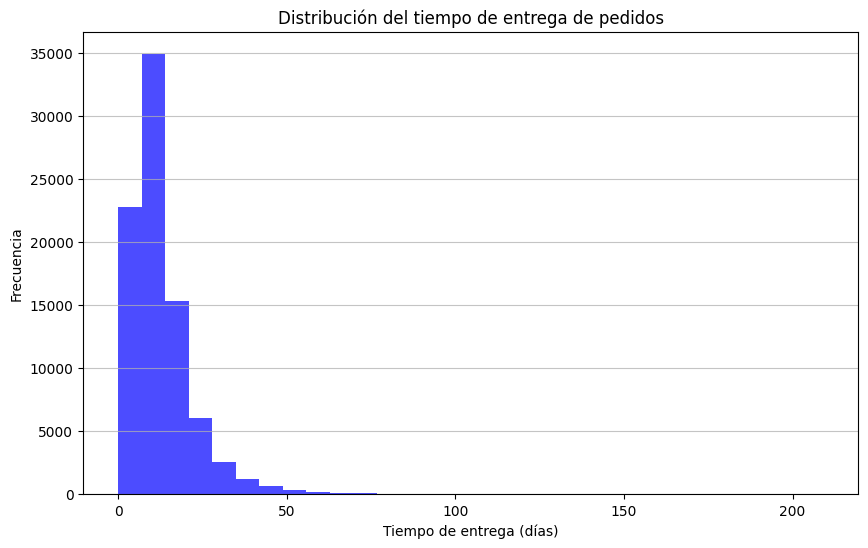

In [1038]:
#graph distribution of order delivery time
plt.figure(figsize=(10, 6))
plt.hist(df_items_orders['Order_Delivery_Time'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución del tiempo de entrega de pedidos')
plt.xlabel('Tiempo de entrega (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

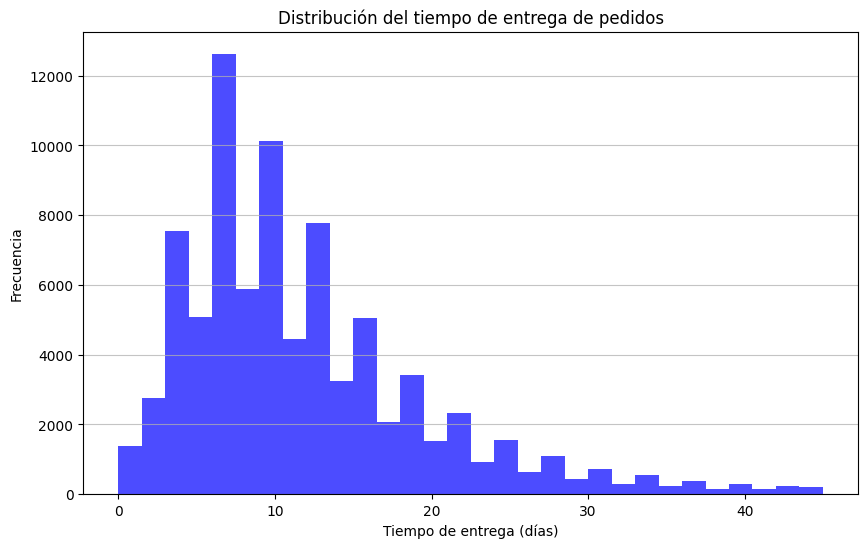

In [1039]:
# remove outliers from order delivery time
q99 = df_items_orders["Order_Delivery_Time"].quantile(0.99)
df_items_orders = df_items_orders[df_items_orders["Order_Delivery_Time"] < q99]
#graph distribution of order delivery time
plt.figure(figsize=(10, 6))
plt.hist(df_items_orders['Order_Delivery_Time'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución del tiempo de entrega de pedidos')
plt.xlabel('Tiempo de entrega (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [1040]:
#nueva columna para ver si es dia habil o no
df_items_orders['Order_Purchase_Timestamp'] = pd.to_datetime(df_items_orders['Order_Purchase_Timestamp'])
df_items_orders['Order_Purchase_Weekday'] = df_items_orders['Order_Purchase_Timestamp'].dt.dayofweek
df_items_orders['Order_Purchase_Weekday'] = df_items_orders['Order_Purchase_Weekday'].apply(lambda x: 1 if x < 5 else 0) #1 si es dia habil, 0 si no lo es
df_items_orders.drop(columns=['Order_Purchase_Timestamp'], inplace=True)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_24828\1280120237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items_orders['Order_Purchase_Timestamp'] = pd.to_datetime(df_items_orders['Order_Purchase_Timestamp'])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_24828\1280120237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items_orders['Order_Purchase_Weekday'] = df_items_orders['Order_Purchase_Timestamp'].dt.dayofweek
C:\Users\Pedro\AppData\Local\Temp\ipykernel_24828\1280120237.py:4: SettingWithC

In [1041]:
#ver si esto es valido
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#columns_to_scale = ["Freight_Value", "Product_Weight_Gr", "product_volume", "Distance"]
#df_items_orders[columns_to_scale] = scaler.fit_transform(df_items_orders[columns_to_scale])

In [1042]:
#show columns
df_items_orders

,Freight_Value,Order_Delivery_Time,Product_Weight_Gr,Distance,product_volume,Product_Category_Name_Air_Conditioning,Product_Category_Name_Art,Product_Category_Name_Arts_And_Craftmanship,Product_Category_Name_Audio,Product_Category_Name_Auto,...,Product_Category_Name_Signaling_And_Security,Product_Category_Name_Small_Appliances,Product_Category_Name_Small_Appliances_Home_Oven_And_Coffee,Product_Category_Name_Sports_Leisure,Product_Category_Name_Stationery,Product_Category_Name_Tablets_Printing_Image,Product_Category_Name_Telephony,Product_Category_Name_Toys,Product_Category_Name_Watches_Gifts,Order_Purchase_Weekday
0,13.29,7.0,650.0,765.248762,3528.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,19.93,16.0,30000.0,477.138176,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,17.87,7.0,3050.0,80.846523,14157.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,12.79,6.0,200.0,192.666408,2400.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,18.14,25.0,3750.0,744.756957,42000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84025,43.41,17.0,10150.0,1033.638118,53400.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
84026,36.53,9.0,8950.0,523.544995,44460.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
84027,16.95,4.0,967.0,523.544995,9576.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
84028,8.72,1.0,100.0,504.284007,8000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [1043]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_items_orders.drop(columns=["Order_Delivery_Time"]) ##variable a predecir
y = df_items_orders["Order_Delivery_Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1044]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [1045]:
y_test[:5]

33416     8.0
30806    13.0
71266    12.0
52569    13.0
58358     6.0
Name: Order_Delivery_Time, dtype: float64

In [1046]:
reg.predict(X_test[:5])

array([10.49738084,  8.63022551, 14.56173838,  8.0263263 , 12.39872824])

In [1047]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))

R²: 0.14697916290444246


## Con random forest

In [1048]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
r2 = r2_score(y_test, y_pred)

print(f"📊 R²: {r2:.4f}")


📊 R²: 0.2520


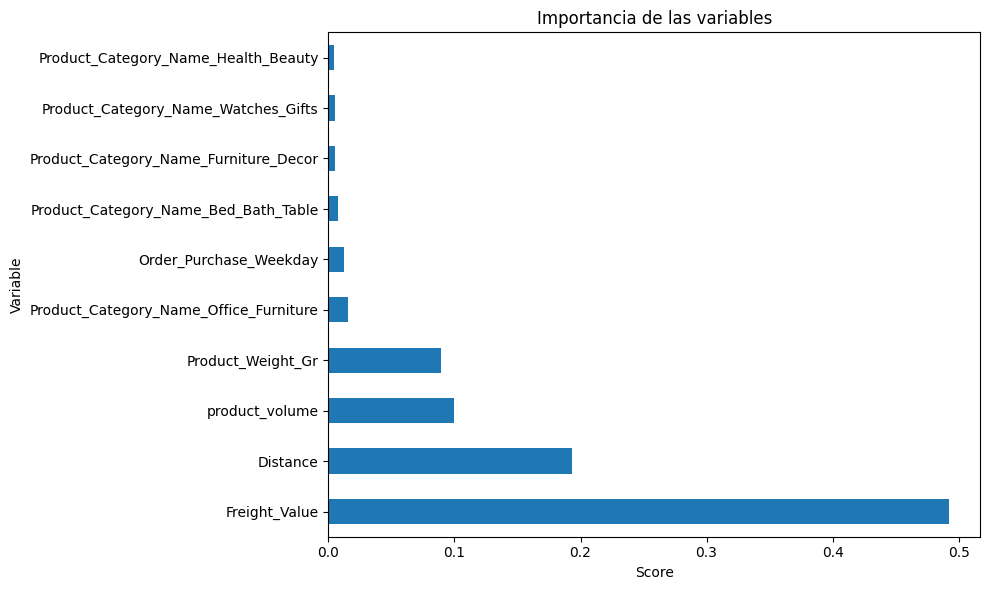

In [1049]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 6))
forest_importances.nlargest(10).plot(kind='barh')
plt.title("Importancia de las variables")
plt.xlabel("Score")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


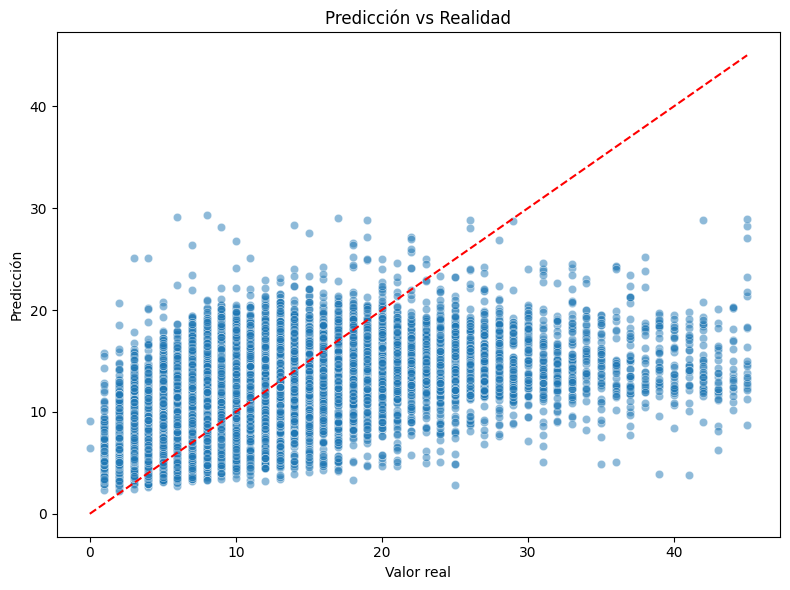

In [1050]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Predicción vs Realidad")
plt.tight_layout()
plt.show()


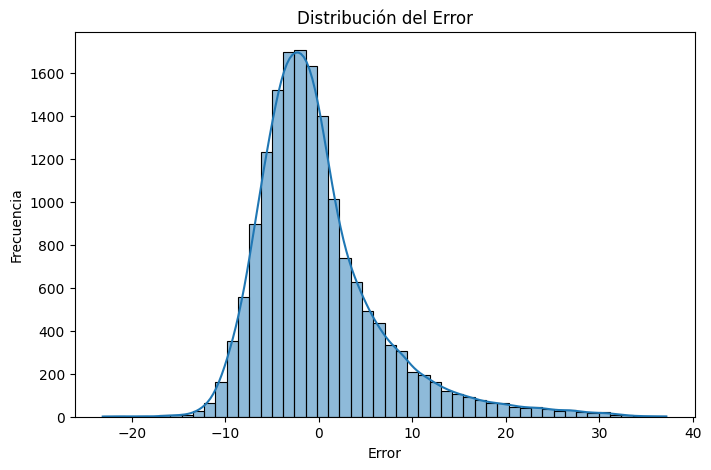

In [1051]:
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=50, kde=True)
plt.title("Distribución del Error")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Absolute Error (MAE): 4.8708
Mean Squared Error (MSE): 45.1725
